Step: 1, 100
0.1 * 100 + (1 - 0.1) * 100 = 100.0
Step: 2, 120
0.1 * 120 + (1 - 0.1) * 100.0 = 102.0
Step: 3, 112
0.1 * 112 + (1 - 0.1) * 102.0 = 103.0
Step: 4, 100
0.1 * 100 + (1 - 0.1) * 103.0 = 102.7
Step: 5, 105
0.1 * 105 + (1 - 0.1) * 102.7 = 102.93
Step: 6, 98
0.1 * 98 + (1 - 0.1) * 102.93 = 102.43700000000001
Step: 7, 102
0.1 * 102 + (1 - 0.1) * 102.43700000000001 = 102.39330000000001
Step: 8, 110
0.1 * 110 + (1 - 0.1) * 102.39330000000001 = 103.15397000000002
Step: 9, 108
0.1 * 108 + (1 - 0.1) * 103.15397000000002 = 103.63857300000001
Step: 10, 107
0.1 * 107 + (1 - 0.1) * 103.63857300000001 = 103.97471570000002
Step: 11, 111
0.1 * 111 + (1 - 0.1) * 103.97471570000002 = 104.67724413000002
Step: 12, 109
0.1 * 109 + (1 - 0.1) * 104.67724413000002 = 105.10951971700003
Step: 13, 112
0.1 * 112 + (1 - 0.1) * 105.10951971700003 = 105.79856774530003
Step: 14, 115
0.1 * 115 + (1 - 0.1) * 105.79856774530003 = 106.71871097077003
Step: 15, 113
0.1 * 113 + (1 - 0.1) * 106.71871097077003 = 107

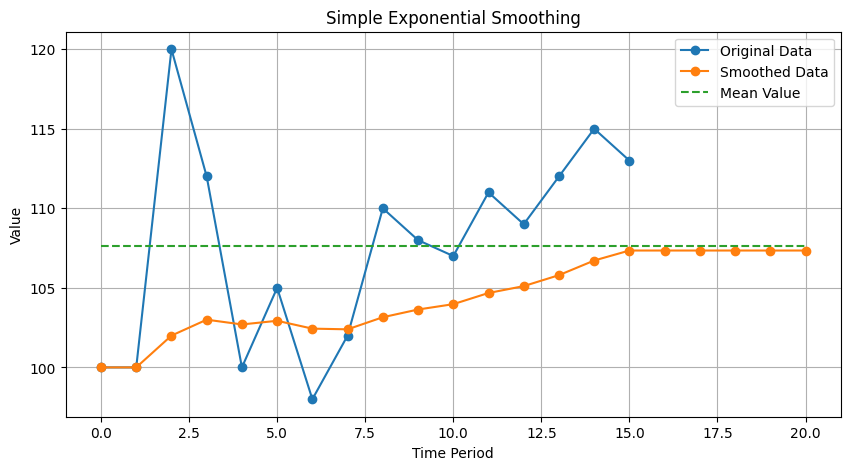

In [9]:
# Proste wygładzanie wykładnicze w czystym Pythonie
# Nie są wymagane żadne zewnętrzne biblioteki!

import matplotlib.pyplot as plt

def simple_exponential_smoothing(data, alpha):
    """
    Implementacja prostego wygładzania wykładniczego
    data: lista liczb
    alpha: parametr wygładzania (0 < alpha <= 1)
    """
    if not data:
        return []
    
    # Inicjalizacja pierwszą wartością
    smoothed = [data[0]]
    
    # Zastosowanie formuły wygładzania wykładniczego
    for i in range(1, len(data)):
        # S_t = α * X_t + (1-α) * S_{t-1}
        new_value = alpha * data[i] + (1 - alpha) * smoothed[i-1]

        # Aktualna wartość kroku to 30% (przy założeniu, że alpha=0.3) wartości bieżącej i 70% wartości poprzedniej wygładzonej

        print(f"Step: {i}, {data[i]}")  # Komunikat debugowania
        print(f"{alpha} * {data[i]} + (1 - {alpha}) * {smoothed[i-1]} = {new_value}")  # Komunikat debugowania

        smoothed.append(new_value)
    
    return smoothed

# Przykładowe dane
prices = [100, 100, 120, 112, 100, 105, 98, 102, 110, 108, 107, 111, 109, 112, 115, 113]
alpha = 0.1  # Parametr wygładzania

mean_values = [sum(prices) / len(prices)] * (len(prices) + 5)

# Zastosowanie wygładzania
smoothed_prices = simple_exponential_smoothing(prices, alpha)

print(smoothed_prices)

# Wyświetlenie wyników
print("Original data:", prices)
print("Smoothed data:", [round(x, 2) for x in smoothed_prices])

# # Prognoza następnej wartości
next_forecast = smoothed_prices[-1]
print(f"Next period forecast: {next_forecast:.2f}")

smoothed_prices = smoothed_prices + [next_forecast]*5

# # Prosta wizualizacja (przy użyciu tekstu)
# print("\nComparison:")
# for i, (orig, smooth) in enumerate(zip(prices, smoothed_prices)):
#     print(f"Period {i+1:2d}: Original={orig:3d}, Smoothed={smooth:6.2f}")

figure = plt.figure(figsize=(10, 5))
plt.plot(prices, label='Original Data', marker='o')
plt.plot(smoothed_prices, label='Smoothed Data', marker='o')
plt.plot(mean_values, label='Mean Value', linestyle='--')
plt.title('Simple Exponential Smoothing')
plt.xlabel('Time Period')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()